In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

**Load Dataset**

In [ ]:
df = pd.read_csv("employee_productivity.csv")

**Select Features & Target**

In [ ]:
features = ["Work_Hours", "Task_Completion_Rate", "Deadlines_Met", "Breaks_Taken",
            "Email_Response_Time", "Years_of_Experience", "Work_From_Home_Days",
            "Overtime_Hours", "Sick_Leaves_Taken", "Projects_Handled", "Job_Satisfaction"]

In [ ]:
X = df[features]  # Input Features
y = df["Salary"]  # Target Variable (Salary Prediction)

**Split Data into Training & Testing**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train Random Forest Model**

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Make Predictions**

In [ ]:
y_pred = model.predict(X_test)

**Bar Plot for Feature Importance**

<ipython-input-8-291e1565bbff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=features, palette="viridis")


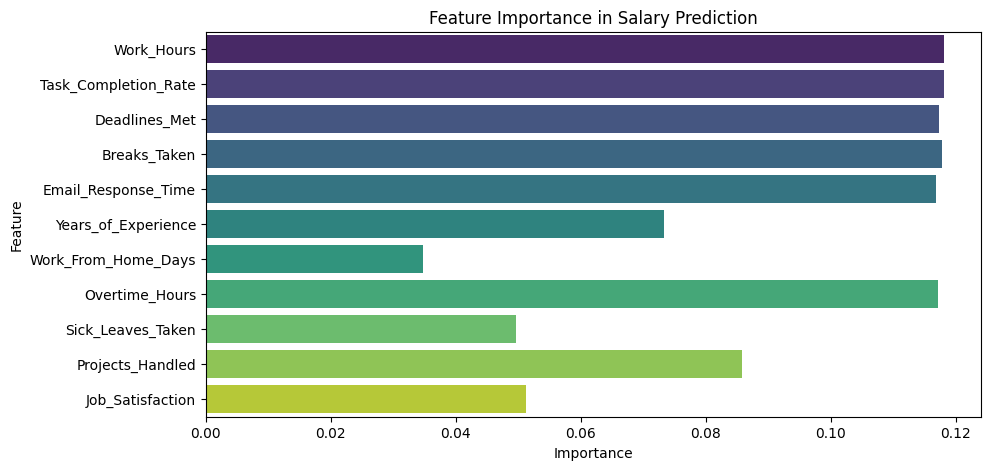

In [ ]:
feature_importance = model.feature_importances_
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=features, palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Salary Prediction")
plt.show()

**Box Plot - Compare Features for High vs Low Salary**

<ipython-input-10-797e77170fb1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Salary_Category", y="Work_Hours", data=df, palette="coolwarm")


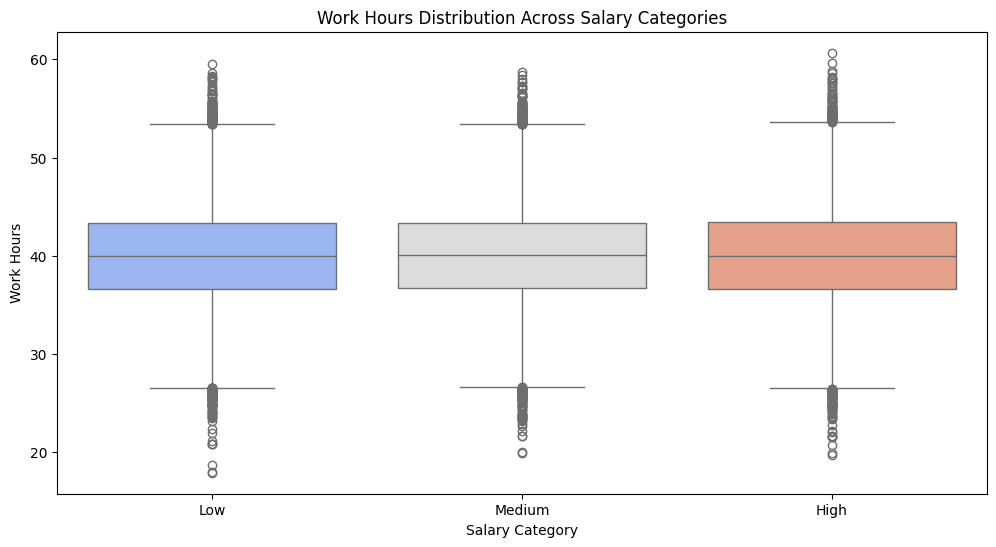

In [ ]:
df["Salary_Category"] = pd.qcut(df["Salary"], q=3, labels=["Low", "Medium", "High"])
plt.figure(figsize=(12, 6))
sns.boxplot(x="Salary_Category", y="Work_Hours", data=df, palette="coolwarm")
plt.xlabel("Salary Category")
plt.ylabel("Work Hours")
plt.title("Work Hours Distribution Across Salary Categories")
plt.show()

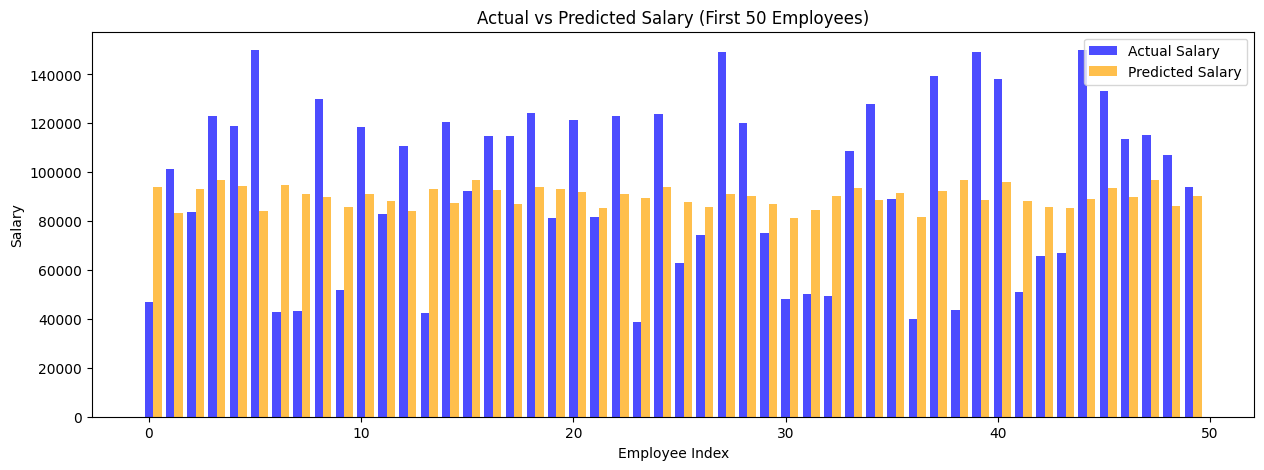

In [ ]:
plt.figure(figsize=(15, 5))
width = 0.4  # Width of bars
indices = np.arange(50)  # First 50 employees for clarity

plt.bar(indices, y_test[:50], width=width, label="Actual Salary", alpha=0.7, color="blue")
plt.bar(indices + width, y_pred[:50], width=width, label="Predicted Salary", alpha=0.7, color="orange")

plt.xlabel("Employee Index")
plt.ylabel("Salary")
plt.title("Actual vs Predicted Salary (First 50 Employees)")
plt.legend()
plt.show()